# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [51]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [52]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [53]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [54]:
df_train.shape

(15223, 52)

In [55]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [56]:
df_test.shape

(14910, 52)

In [57]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [58]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [59]:
df = df_test.append(df_train).reset_index(drop=True)

In [60]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [19]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Среднее', 'Среднее специальное', 'Ученая степень', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Логистика', 'Строительство', 'Недвижимость', 'ЧОП/Детективная д-ть', 'СМИ/Реклама/PR-агенства', 'Транспорт', 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Сборочные производства', 'Информационные технологии', 'Наука', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство', 'Государственная служба', 'Подбор персонала', 'Энергетика', 'Другие сферы', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Банк/Финансы', 'Маркетинг', 'Управляющая компания', 'Торговля', 'Информационные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [25]:
#df['PERSONAL_INCOME']=df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
#df['CREDIT']=df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
#df['FST_PAYMENT']=df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
#df['LOAN_AVG_DLQ_AMT']=df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
#df['LOAN_MAX_DLQ_AMT']=df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM
sample


Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`


### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [33]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
df[df["GEN_INDUSTRY"].isnull()][null_columns]       
# AGREEMENT_RK TARGET

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,TP_PROVINCE,REGION_NM,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
1,NaN,NaN,NaN,NaN,NaN,Орловская область,ЦЕНТРАЛЬНЫЙ 1,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Кировская область,ПРИВОЛЖСКИЙ,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,Омская область,ЗАПАДНО-СИБИРСКИЙ,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,Алтайский край,ЗАПАДНО-СИБИРСКИЙ,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,Курганская область,УРАЛЬСКИЙ,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,Ивановская область,ЦЕНТРАЛЬНЫЙ 2,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,Тульская область,ЦЕНТРАЛЬНЫЙ 1,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,Курская область,ЦЕНТРАЛЬНЫЙ 1,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,Вологодская область,ЦЕНТРАЛЬНЫЙ 2,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,Пензенская область,ПОВОЛЖСКИЙ,NaN,NaN


# REGION_NM всего 2 записи - можно просто строки убрать из выборки
# PREVIOUS_CARD_NUM_UTILIZED почти все записи не заполнены - можно просто строки убрать из выборки
# GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,WORK_TIME  - все пустые в пределах одной выборки, это просто не до конца заполненнык данные - тоже можно убрать

# TP_PROVINCE дублируется /можно вычислить по POSTAL_ADDRESS_PROVINCE. при первом грубом подсчете тоже можно проигнорировать




#### Задание 2. Есть ли категориальные признаки? Что с ними делать?


In [45]:
#df = df.drop(null_columns, axis=1)
#df = df.drop(['AGREEMENT_RK','sample'], axis=1)
#df = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS','FAMILY_INCOME'])
#df = pd.get_dummies(df, columns=['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE'])
#df = pd.get_dummies(df, columns=['POSTAL_ADDRESS_PROVINCE'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 300 entries, TARGET to POSTAL_ADDRESS_PROVINCE_Ярославская область
dtypes: float64(5), int64(31), uint8(264)
memory usage: 15.9 MB


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [75]:
def preproc_data2(df_input):
    df_output = df_input.copy()
    # Удаляло идентификатор `AGREEMENT_RK`
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    #  Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    for i in ['PERSONAL_INCOME','CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT']:
        df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    # Что-то делала с пропусками
    null_columns=df_output.columns[df_output.isnull().any()]
    df_output = df_output.drop(null_columns, axis=1)
    #  Кодировала категориальные признаки 
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS','FAMILY_INCOME','REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE'])
    
    ## Your Code Here
    
    return df_output

In [81]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)
df_preproc = df.pipe(preproc_data2)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [92]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
X =  df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

(14910, 299)

#### Задание 5. Обучение и оценка качества разных моделей

In [94]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [101]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc = rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)


C:\Users\Anaconda\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [107]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
accuracy_dtc=accuracy_score(y_test, predict_dtc)
print('accuracy dtc',accuracy_dtc )
precision_dtc= precision_score(y_test, predict_dtc)
print('precision dtc',precision_dtc)
recall_dtc=recall_score(y_test, predict_dtc)
print('recall dtc',recall_dtc )

accuracy_rfc=accuracy_score(y_test, predict_rfc)
print('accuracy rfc', accuracy_rfc)
precision_rfc=precision_score(y_test, predict_rfc)
print('precision rfc', precision_rfc)
recall_rfc=recall_score(y_test, predict_rfc)
print('recall rfc',recall_rfc )

accuracy_lr=accuracy_score(y_test, predict_lr)
print('accuracy lr', accuracy_lr)
precision_lr=precision_score(y_test, predict_lr)
print('precision lr',precision_lr )
recall_lr=recall_score(y_test, predict_lr)
print('recall lr', recall_lr)


accuracy dtc 0.7771982116244411
precision dtc 0.13690476190476192
recall dtc 0.12994350282485875
accuracy rfc 0.8651266766020864
precision rfc 0.3
recall rfc 0.01694915254237288
accuracy lr 0.8666169895678092
precision lr 0.0
recall lr 0.0


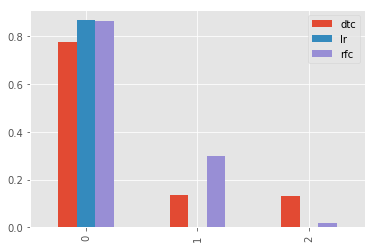

In [109]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
dfv = pd.DataFrame.from_dict({ 'dtc':[accuracy_dtc,precision_dtc,recall_dtc],
                               'rfc':[accuracy_rfc,precision_rfc,recall_rfc],
                               'lr': [accuracy_lr,precision_lr,recall_lr]}
                            )
dfv.plot(kind='bar', stacked=False)
## Your Code Here

(-0.01, 1.01)

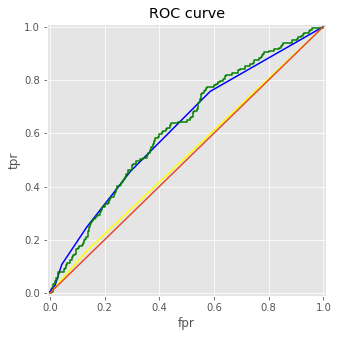

In [104]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc, color='yellow')
plt.plot(fpr_rfc, tpr_rfc, color='blue')
plt.plot(fpr_lr, tpr_lr, color='green')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [113]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=52)
import statistics
dtc_cross_mean = statistics.mean(cross_val_score(
    dtc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
))

rfc_cross_mean = statistics.mean(cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
))

lr_cross_mean = statistics.mean(cross_val_score(
    lr,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
))
print(dtc_cross_mean,rfc_cross_mean,lr_cross_mean)

## Your Code Here

0.512953091118995 0.6274790526952998 0.6443595657234101


In [114]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
predict_proba_lr = lr.predict_proba(X_test)

## Your Code Here

C:\Users\Anaconda\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [115]:
# Померить roc_auc на тесте


In [116]:
roc_auc_score(y_test, predict_proba_lr[:,1])

0.6190684028030358